### Havayolu, yolcu ve uçuş sayısına göre kümeleme-Clustering

Bu projede San Francisco Havaalanı datasıyla, havayolu şirketlerine göre kümeleme yapacağız, metric ise silhouette score olacak.

<img src="https://storage.googleapis.com/kaggle-datasets-images/1395777/2313138/0013873c12084a57b568f37da0fa0565/dataset-cover.jpg?t=2021-06-08-06-07-17">

<a href='https://www.kaggle.com/datasets/mfaisalqureshi/air-travel-data-set-of-sans-francisco-airport/data'>Data dosyasını burada bulabilirsiniz</a>



# Gerekli paketlerin importu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer

pd.set_option('display.max_columns', None)


* Data dictionary

## EDA

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.sample(7)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
15529,201607,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,6436
16480,201702,United Airlines,UA,United Airlines,UA,International,Mexico,Deplaned,Other,International,G,19342
12026,201402,United Airlines,UA,United Airlines,UA,International,Europe,Deplaned,Other,International,G,16888
8351,201106,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Thru / Transit,Other,Terminal 3,E,362
8930,201111,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,International,G,31254
6646,201004,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,28495
9168,201201,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Enplaned,Other,International,G,10449


In [4]:
df.isnull().sum()
#hangi sutunlarda boşluk var onu göreceğiz. 

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [5]:
df.info()
# obj ve int sutunları gördük

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [6]:
df['Operating Airline IATA Code'].unique()
#bu sutunddaki datanın çeşidi

array(['TZ', 'AC', 'CA', 'AF', 'NZ', 'FL', 'AS', 'NH', 'AA', 'MQ', 'OZ',
       'EV', '4T', 'BA', 'CX', 'CI', 'DL', 'BR', 'F9', 'HA', 'QX', 'FI',
       'DH', 'JL', 'KL', 'KE', 'LH', 'YV', 'MX', 'YX', 'NW', 'PR', 'SQ',
       'OO', 'SY', 'TA', 'US', 'UA', 'VS', 'WS', nan, 'GL', 'QK', 'QF',
       'A8', 'NK', 'XP', 'EZ', 'AM', 'B6', 'XE', 'WN', 'VX', 'EI', 'G4',
       '9W', 'BBB', 'EK', 'XJ', 'WO', 'AB', 'RW', 'LX', 'LP', 'SE', 'MU',
       'SK', '5Y', 'CP', 'EY', 'CZ', 'TK', 'CM', 'AI', 'FJ', 'WW', 'Y4',
       'MT', 'AY', '4O', 'HX', 'IB', 'BF'], dtype=object)

# DATA VIZUALIZATION

<Axes: xlabel='GEO Summary', ylabel='count'>

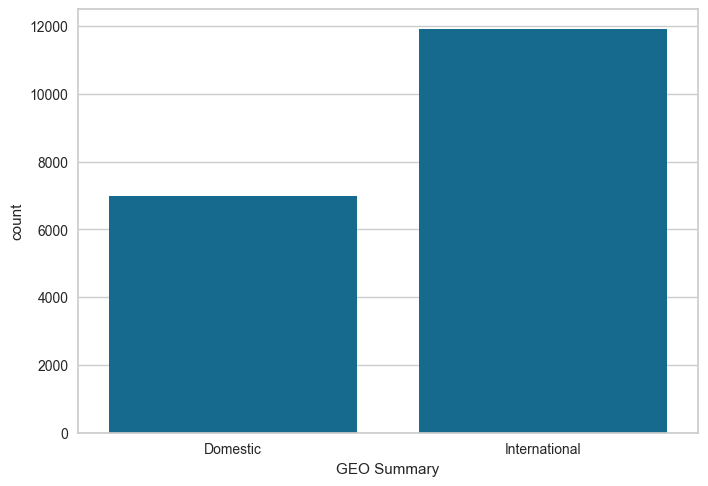

In [7]:
sns.countplot(x=df['GEO Summary'])

<Axes: xlabel='Price Category Code', ylabel='count'>

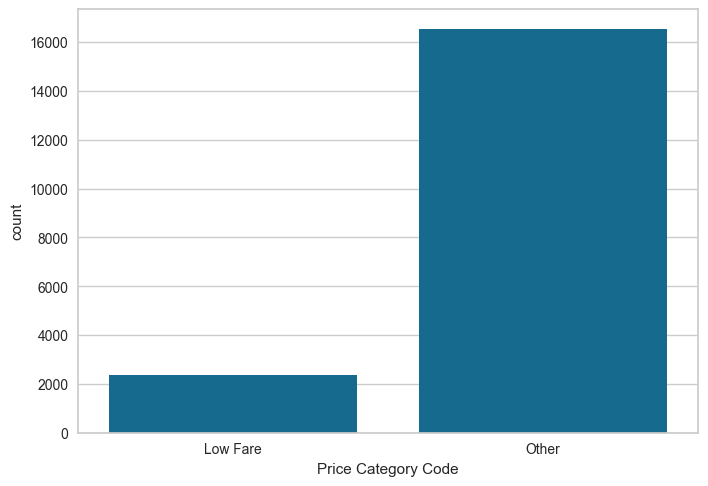

In [8]:
sns.countplot(x=df['Price Category Code'])

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'US'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Australia / Oceania'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Central America'),
  Text(7, 0, 'Middle East'),
  Text(8, 0, 'South America')])

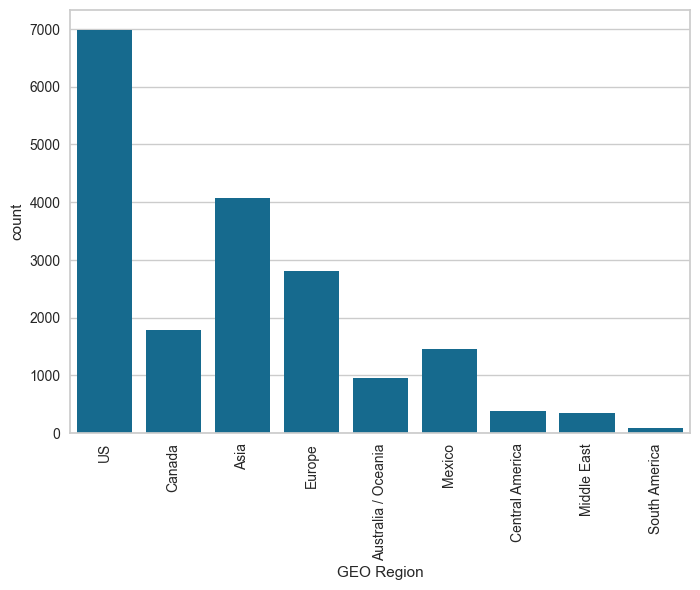

In [9]:
sns.countplot(x=df['GEO Region'])
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, 'Deplaned'),
  Text(1, 0, 'Enplaned'),
  Text(2, 0, 'Thru / Transit')])

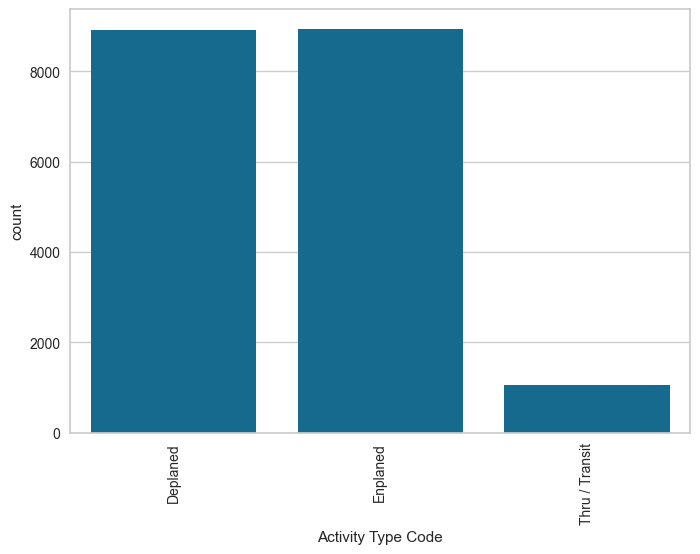

In [10]:
sns.countplot(x=df['Activity Type Code'])
plt.xticks(rotation=90)
#aktrma az


In [11]:
df['Operating Airline IATA Code'].nunique()
#bu sutunddaki datanın kaç çeşit olduğu

82

In [12]:
df['Operating Airline'].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [13]:
df.drop(["Published Airline IATA Code","Operating Airline IATA Code","Published Airline","Boarding Area" ],axis=1,inplace=True)
# Operating a..  sutunu yeterli o yüzden bu sutunları sildim.

In [14]:
df.drop(['Terminal'],axis=1,inplace=True)

## Feature Engineering

In [15]:
d={'Domestic':0,'International':1}

In [16]:
df['GEO Summary']=df['GEO Summary'].map(d)

In [17]:
d={'Middle East':0,'Asia':1,'Australia / Oceania':2,'Mexico':3,'Europe':4,'South America':5,'Central America':6,'Canada':7,'US':8}

In [18]:
df['GEO Region']=df['GEO Region'].map(d)

In [19]:
d={'Deplaned':0,'Enplaned':1,'Thru / Transit':2}

In [20]:
df['Activity Type Code']=df['Activity Type Code'].map(d)

In [21]:
d={'Low fare':0,'Other':1}

In [22]:
df['Price Category Code']=df['Price Category Code'].map(d)

In [23]:
df['GEO Region']=df['GEO Region'].fillna(df['GEO Region'].mean())

In [24]:
df['GEO Summary']=df['GEO Summary'].fillna(df['GEO Summary'].median())

In [25]:
df['Price Category Code']=df['Price Category Code'].fillna(df['Price Category Code'].mean())

In [26]:
x=df[['Passenger Count','Price Category Code','Operating Airline','GEO Region']]  #KMeans sadece x vardır y yoktur çünkü unsupervised learning yani model, benzerliklerine göre ayırır.

In [27]:
x.head()

,Passenger Count,Price Category Code,Operating Airline,GEO Region
0,27271,1.0,ATA Airlines,8
1,29131,1.0,ATA Airlines,8
2,5415,1.0,ATA Airlines,8
3,35156,1.0,Air Canada,7
4,34090,1.0,Air Canada,7


In [28]:
df["Operating Airline"].value_counts()

Operating Airline
United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: count, Length: 89, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Activity Period      18885 non-null  int64  
 1   Operating Airline    18885 non-null  object 
 2   GEO Summary          18885 non-null  int64  
 3   GEO Region           18885 non-null  int64  
 4   Activity Type Code   18885 non-null  int64  
 5   Price Category Code  18885 non-null  float64
 6   Passenger Count      18885 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ MB


In [30]:
x=pd.get_dummies(x,drop_first=True)

In [31]:
x.head()

,Passenger Count,Price Category Code,GEO Region,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways
0,27271,1.0,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,29131,1.0,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [32]:
df.isnull().sum()

Activity Period        0
Operating Airline      0
GEO Summary            0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Passenger Count        0
dtype: int64

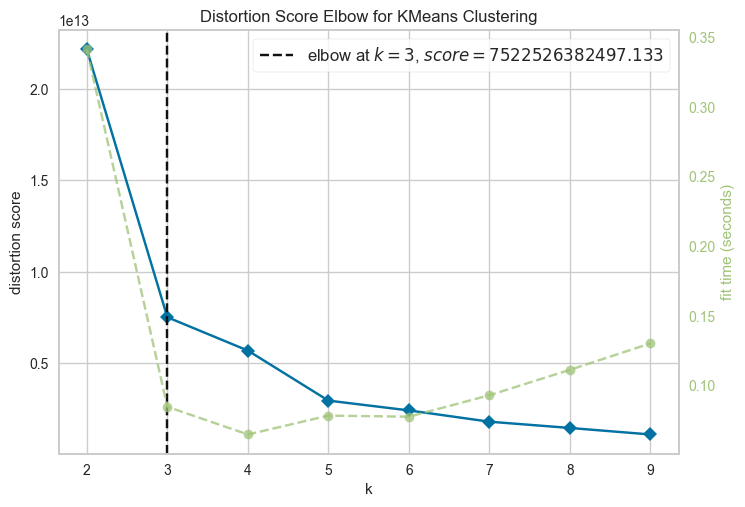

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
km=KMeans(random_state=42)
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()           #dirseğin nerede kırıldığını buldu yani kaç gruba ayırmamız gerektiğini görüyoruz, dirsek 3 te  y eksenine geçiyor yani 3 e ayırmak doğru..

In [35]:
print(x.columns)

Index(['Passenger Count', 'Price Category Code', 'GEO Region',
       'Operating Airline_ATA Airlines', 'Operating Airline_Aer Lingus',
       'Operating Airline_Aeromexico', 'Operating Airline_Air Berlin',
       'Operating Airline_Air Canada', 'Operating Airline_Air Canada Jazz',
       'Operating Airline_Air China', 'Operating Airline_Air France',
       'Operating Airline_Air India Limited',
       'Operating Airline_Air New Zealand',
       'Operating Airline_Air Pacific Limited dba Fiji Airways',
       'Operating Airline_AirTran Airways',
       'Operating Airline_Alaska Airlines',
       'Operating Airline_All Nippon Airways',
       'Operating Airline_Allegiant Air',
       'Operating Airline_American Airlines',
       'Operating Airline_American Eagle Airlines',
       'Operating Airline_Ameriflight', 'Operating Airline_Asiana Airlines',
       'Operating Airline_Atlantic Southeast Airlines',
       'Operating Airline_Atlas Air, Inc', 'Operating Airline_BelAir Airlines',
    

## Modelling

In [36]:
model=KMeans(3)

In [37]:
model=model.fit(x)

In [38]:
tahmin=model.predict(x)

In [39]:
x['Cluster']=tahmin

In [40]:
silhouette_score(x,tahmin)  

0.8285980938783077

Text(0, 0.5, 'GEO Region')

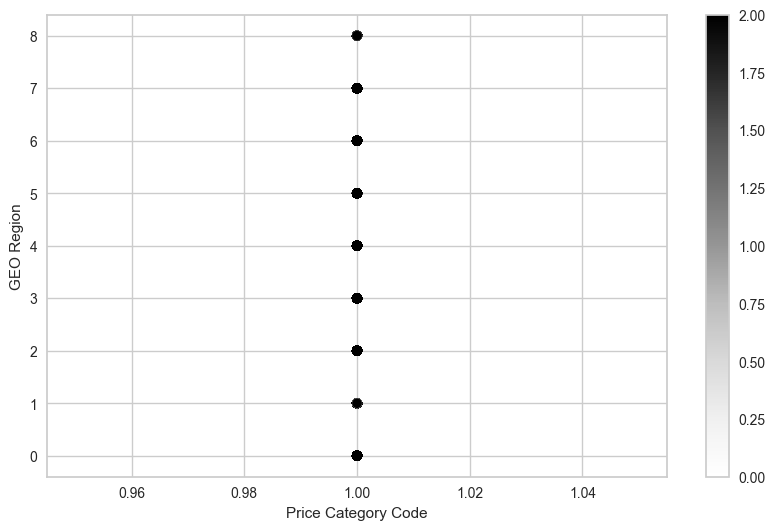

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x['Price Category Code'], x['GEO Region'], c=tahmin)
plt.colorbar()
plt.xlabel('Price Category Code') 
plt.ylabel('GEO Region')
#grafikte bir yerde sorun var gibi fakat anlamadım.

In [41]:
x.head()

,Passenger Count,Price Category Code,GEO Region,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,Operating Airline_Air Pacific Limited dba Fiji Airways,Operating Airline_AirTran Airways,Operating Airline_Alaska Airlines,Operating Airline_All Nippon Airways,Operating Airline_Allegiant Air,Operating Airline_American Airlines,Operating Airline_American Eagle Airlines,Operating Airline_Ameriflight,Operating Airline_Asiana Airlines,Operating Airline_Atlantic Southeast Airlines,"Operating Airline_Atlas Air, Inc",Operating Airline_BelAir Airlines,Operating Airline_Boeing Company,Operating Airline_British Airways,"Operating Airline_COPA Airlines, Inc.",Operating Airline_Cathay Pacific,Operating Airline_China Airlines,Operating Airline_China Eastern,Operating Airline_China Southern,Operating Airline_Compass Airlines,Operating Airline_Delta Air Lines,Operating Airline_EVA Airways,Operating Airline_Emirates,Operating Airline_Etihad Airways,Operating Airline_Evergreen International Airlines,Operating Airline_ExpressJet Airlines,Operating Airline_Finnair,Operating Airline_French Bee,Operating Airline_Frontier Airlines,Operating Airline_Hawaiian Airlines,Operating Airline_Hong Kong Airlines Limited,Operating Airline_Horizon Air,Operating Airline_Iberia,Operating Airline_Icelandair,Operating Airline_Icelandair EHF,Operating Airline_Independence Air,Operating Airline_Japan Airlines,Operating Airline_Jazz Aviation,Operating Airline_Jet Airways,Operating Airline_JetBlue Airways,Operating Airline_KLM Royal Dutch Airlines,Operating Airline_Korean Air Lines,Operating Airline_LAN Peru,Operating Airline_Lufthansa German Airlines,Operating Airline_Mesa Airlines,Operating Airline_Mesaba Airlines,Operating Airline_Mexicana Airlines,Operating Airline_Miami Air International,Operating Airline_Midwest Airlines,Operating Airline_Northwest Airlines,Operating Airline_Pacific Aviation,Operating Airline_Philippine Airlines,Operating Airline_Qantas Airways,Operating Airline_Republic Airlines,Operating Airline_SAS Airlines,Operating Airline_Servisair,Operating Airline_Singapore Airlines,Operating Airline_SkyWest Airlines,Operating Airline_Southwest Airlines,Operating Airline_Spirit Airlines,Operating Airline_Sun Country Airlines,Operating Airline_Swiss International,Operating Airline_Swissport USA,Operating Airline_TACA,Operating Airline_Thomas Cook Airlines,Operating Airline_Trego Dugan Aviation,Operating Airline_Turkish Airlines,Operating Airline_US Airways,Operating Airline_United Airlines,Operating Airline_United Airlines - Pre 07/01/2013,Operating Airline_Virgin America,Operating Airline_Virgin Atlantic,Operating Airline_Volaris Airlines,Operating Airline_WOW Air,Operating Airline_WestJet Airlines,Operating Airline_World Airways,Operating Airline_XL Airways France,Operating Airline_Xtra Airways,Cluster
0,27271,1.0,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
1,29131,1.0,8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [42]:
x['Cluster'].value_counts()
#en genel özelliklere sahip cluster 2

Cluster
2    16492
0     1968
1      425
Name: count, dtype: int64

In [43]:
wcss=[]
for i in range(2,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    #burada da yine en uygun  küme sayısının 3 olduğunu görüyoruz

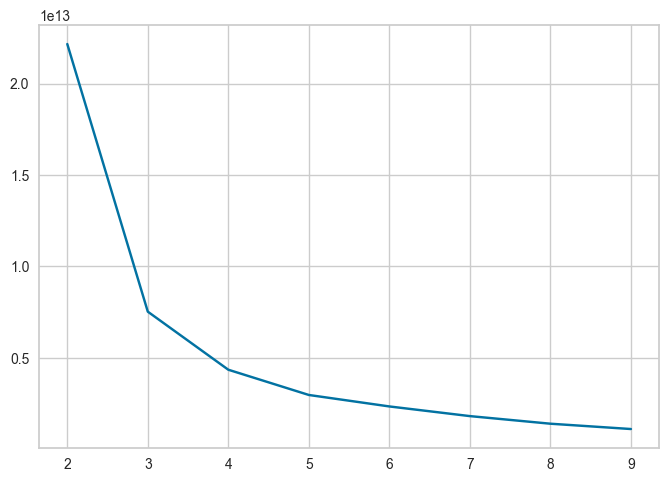

In [44]:
plt.plot(range(2,10),wcss)

* Bu çalışmada model 3 gruba ayırdı. bunu grafikte göstermek istedim fakat grafikte bir hata oldu, silhouette score 0.8285980938783077.